In [1]:
import pandas as pd
import numpy as np

In [2]:
names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
 "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
 "num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", 
 "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate",
 "same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
 "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
 "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
train_df=pd.read_csv('D:/Pyton-analytixlabs-cs/3. Network Intrusion Detection System/NSL_Dataset/train.txt',names=names)

In [4]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
cat_vars=train_df.loc[:,['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']]

In [7]:
cat_vars.dtypes

protocol_type     object
service           object
flag              object
land               int64
logged_in          int64
root_shell         int64
su_attempted       int64
is_host_login      int64
is_guest_login     int64
dtype: object

In [8]:
cat_vars_d=pd.get_dummies(cat_vars.select_dtypes('object'))

In [9]:
train_df.drop(labels=cat_vars.select_dtypes('object'),axis=1,inplace=True)

In [10]:
merge_data=pd.concat([train_df,cat_vars_d],axis=1)

In [11]:
merge_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
merge_data.isna().any().value_counts()

False    124
dtype: int64

In [13]:
merge_data['attack']=np.where(merge_data.attack == 'normal',0,1)

In [14]:
merge_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
test_df=pd.read_csv('D:/Pyton-analytixlabs-cs/3. Network Intrusion Detection System/NSL_Dataset/test.txt',names=names)

In [16]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [17]:
cat_vars=test_df.loc[:,['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']]

In [18]:
cat_vars_d=pd.get_dummies(cat_vars.select_dtypes('object'))

In [19]:
test_df.drop(labels=cat_vars.select_dtypes('object'),axis=1,inplace=True)

In [20]:
merge_data_test=pd.concat([test_df,cat_vars_d],axis=1)

In [21]:
merge_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
merge_data_test.attack

0        neptune
1        neptune
2         normal
3          saint
4          mscan
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: attack, Length: 22544, dtype: object

In [23]:
merge_data_test['attack']=np.where(merge_data_test.attack =='normal',0,1)

In [24]:
var=merge_data.columns.difference(['attack'])

In [33]:
from sklearn.model_selection import train_test_split

trainx,testx,trainy,testy=train_test_split(merge_data[var],merge_data['attack'],test_size=0.3,random_state=123)

# Naives Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics  as metrics

In [28]:
nb =GaussianNB()

In [29]:
nb.fit(trainx,trainy)

GaussianNB()

In [32]:
n_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': nb.predict( trainx ) } )

In [33]:
n_train_pred

,actual,predicted
110849,1,0
4591,0,0
96407,1,0
55086,1,0
52860,1,0
...,...,...
61404,0,0
17730,1,0
28030,1,0
15725,0,0


In [35]:
nb.score(trainx,trainy)

0.5348998083487373

In [36]:
n_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': nb.predict( testx ) } )

In [37]:
n_test_pred

,actual,predicted
85247,0,0
121265,1,0
99209,1,0
8177,1,0
90461,0,0
...,...,...
43376,0,0
121620,1,0
125669,1,0
64011,0,0


In [38]:
nb.score(testx,testy)

0.5331022438611346

In [40]:
metrics.confusion_matrix(n_test_pred.actual,n_test_pred.predicted)

array([[19852,   310],
       [17335,   295]], dtype=int64)

In [41]:
metrics.accuracy_score(n_test_pred.actual,n_test_pred.predicted)

0.5331022438611346

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [ ]:
DecisionTreeClassifier()

In [27]:
param_grid={'max_depth':np.arange(4,30),
           'criterion':['gini','entropy']}

In [28]:
d_tree_g=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5)

In [29]:
d_tree_g.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [30]:
d_tree_g.best_params_

{'criterion': 'entropy', 'max_depth': 18}

In [31]:
d_tree_g.best_score_

0.9989566891640369

In [29]:
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=18,random_state=123)

In [30]:
d_tree.fit(trainx,trainy)

DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=123)

In [31]:
d_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': d_tree.predict( trainx ) } )

In [32]:
d_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,1,1
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,1,1
15725,0,0


In [33]:
metrics.accuracy_score(d_train_pred.actual,d_train_pred.predicted)

1.0

In [34]:
metrics.confusion_matrix(d_train_pred.actual,d_train_pred.predicted)

array([[47181,     0],
       [    0, 41000]], dtype=int64)

In [35]:
d_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': d_tree.predict( testx ) } )

In [36]:
d_test_pred

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


In [37]:
metrics.accuracy_score(d_test_pred.actual,d_test_pred.predicted)

0.9987298899237934

In [38]:
metrics.confusion_matrix(d_test_pred.actual,d_test_pred.predicted)

array([[20134,    28],
       [   20, 17610]], dtype=int64)

In [39]:
merge_data_test.shape

(22544, 118)

In [48]:
merge_data_test['service_aol']=0
merge_data_test['service_harvest']=0
merge_data_test['service_http_2784']=0
merge_data_test['service_http_8001']=0
merge_data_test['service_red_i']=0
merge_data_test['service_urh_i']=0

In [49]:
d_test = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': d_tree.predict(merge_data_test[merge_data_test.columns.difference(['attack'])]) } )

In [50]:
d_test

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [52]:
metrics.confusion_matrix(d_test.actual,d_test.predicted)

array([[9382,  329],
       [3225, 9608]], dtype=int64)

In [53]:
metrics.accuracy_score(d_test.actual,d_test.predicted)

0.8423527324343506

In [41]:
from sklearn import tree

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150,150))
tree.plot_tree(d_tree,filled=True)

[Text(5606.023237573819, 7899.1875, 'X[115] <= 28.5\nentropy = 0.996\nsamples = 88181\nvalue = [47181, 41000]'),
 Text(3315.8710629921256, 7389.5625, 'X[1] <= 0.005\nentropy = 0.407\nsamples = 40678\nvalue = [3311, 37367]'),
 Text(1845.354330708661, 6879.9375, 'X[29] <= 19.5\nentropy = 0.938\nsamples = 9048\nvalue = [3204, 5844]'),
 Text(1252.2047244094488, 6370.3125, 'X[39] <= 0.5\nentropy = 0.484\nsamples = 6489\nvalue = [680, 5809]'),
 Text(263.62204724409446, 5860.6875, 'X[57] <= 0.5\nentropy = 0.031\nsamples = 3477\nvalue = [11, 3466]'),
 Text(197.71653543307085, 5351.0625, 'X[9] <= 1.5\nentropy = 0.007\nsamples = 3468\nvalue = [2, 3466]'),
 Text(131.81102362204723, 4841.4375, 'X[115] <= 19.0\nentropy = 0.246\nsamples = 49\nvalue = [2, 47]'),
 Text(65.90551181102362, 4331.8125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(197.71653543307085, 4331.8125, 'X[29] <= 11.5\nentropy = 0.592\nsamples = 14\nvalue = [2, 12]'),
 Text(131.81102362204723, 3822.1875, 'entropy = 0.0\ns

# Ada Boost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
AdaBoostClassifier()

In [32]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_g= {'n_estimators':[100,200,300,400,500],
          'learning_rate' : [10**x for x in range(-3,1)]}

In [21]:
grid_ada=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_g,cv=5,n_jobs=-1)

In [31]:
grid_ada.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [32]:
grid_ada.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [35]:
grid_ada.best_score_

0.9979587433030673

In [36]:
ada_tree=AdaBoostClassifier(n_estimators=500,learning_rate=1,random_state=123)

In [37]:
ada_tree.fit(trainx,trainy)

AdaBoostClassifier(learning_rate=1, n_estimators=500, random_state=123)

In [39]:
ada_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': ada_tree.predict( trainx ) } )

In [40]:
ada_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,1,1
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,1,1
15725,0,0


In [44]:
import sklearn.metrics as metrics
metrics.accuracy_score(ada_train_pred.actual,ada_train_pred.predicted)

0.9984803982717365

In [45]:
metrics.confusion_matrix(ada_train_pred.actual,ada_train_pred.predicted)

array([[47110,    71],
       [   63, 40937]], dtype=int64)

In [46]:
ada_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': ada_tree.predict( testx ) } )

In [47]:
metrics.accuracy_score(ada_test_pred.actual,ada_test_pred.predicted)

0.9975127011007621

In [48]:
metrics.confusion_matrix(ada_test_pred.actual,ada_test_pred.predicted)

array([[20115,    47],
       [   47, 17583]], dtype=int64)

In [59]:
merge_data.shape

(125973, 124)

In [60]:
merge_data_test.shape

(22544, 118)

In [63]:
merge_data.columns.difference(merge_data_test.columns.to_list())

Index(['service_aol', 'service_harvest', 'service_http_2784',
       'service_http_8001', 'service_red_i', 'service_urh_i'],
      dtype='object')

In [51]:
merge_data_test['service_aol']=0

In [52]:
merge_data_test['service_harvest']=0

In [53]:
merge_data_test['service_http_2784']=0

In [54]:
merge_data_test['service_http_8001']=0

In [55]:
merge_data_test['service_red_i']=0

In [56]:
merge_data_test['service_urh_i']=0

In [71]:
test_data = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': ada_tree.predict( merge_data_test[merge_data_test.columns.difference(['attack'])] ) } )

In [74]:
metrics.accuracy_score(test_data.actual,test_data.predicted)

0.7838005677785663

In [75]:
metrics.confusion_matrix(test_data.actual,test_data.predicted)

array([[8973,  738],
       [4136, 8697]], dtype=int64)

# Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GradientBoostingClassifier()

In [56]:
param_grid={'n_estimators':[100,200,400,600],
            'learning_rate':[10**x for x in range(-3,3)]}

In [86]:
grid_b=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5,n_jobs=-1)

In [87]:
grid_b.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600]})

In [89]:
grid_b.best_params_

{'learning_rate': 1, 'n_estimators': 600}

In [90]:
grid_b.best_score_

0.9994556672384531

In [57]:
g_tree=GradientBoostingClassifier(n_estimators=600,learning_rate=1,random_state=123)

In [59]:
g_tree.fit(trainx,trainy)

GradientBoostingClassifier(learning_rate=1, n_estimators=600, random_state=123)

In [61]:
g_train_data = pd.DataFrame( { 'actual':  trainy,
                            'predicted': g_tree.predict(trainx) } )

In [62]:
metrics.accuracy_score(g_train_data.actual,g_train_data.predicted)

0.9994216441183474

In [63]:
metrics.confusion_matrix(g_train_data.actual,g_train_data.predicted)

array([[47143,    38],
       [   13, 40987]], dtype=int64)

In [64]:
g_test_data = pd.DataFrame( { 'actual':  testy,
                            'predicted': g_tree.predict(testx) } )

In [65]:
metrics.accuracy_score(g_test_data.actual,g_test_data.predicted)

0.9988621930567316

In [66]:
test_data = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': g_tree.predict(merge_data_test[merge_data_test.columns.difference(['attack'])]) } )

In [67]:
metrics.accuracy_score(test_data.actual,test_data.predicted)

0.881875443577005

In [68]:
metrics.confusion_matrix(test_data.actual,test_data.predicted)

array([[ 9392,   319],
       [ 2344, 10489]], dtype=int64)

# Xg Boost

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
from xgboost import XGBClassifier

In [ ]:
XGBClassifier()

In [33]:
param_grid = {'n_estimators': [100,200,300,400,500],
             'learning_rate':[10**x for x in range(-3,3)]}

In [34]:
xgb_g=GridSearchCV(XGBClassifier(),param_grid,cv=5,n_jobs=-1)

In [35]:
xgb_g.fit(trainx,trainy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [37]:
xgb_g.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [36]:
xgb_g.best_score_

0.9995350464605682

In [38]:
xgb_m=XGBClassifier(n_estimators = 500,learning_rate=0.1,random_state=123)

In [39]:
xgb_m.fit(trainx,trainy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
xg_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': xgb_m.predict( trainx ) } )

In [41]:
xg_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,1,1
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,1,1
15725,0,0


In [42]:
import sklearn.metrics as metrics

metrics.accuracy_score(xg_train_pred.actual,xg_train_pred.predicted)

1.0

In [43]:
xg_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': xgb_m.predict( testx ) } )

In [44]:
xg_test_pred

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


In [45]:
metrics.accuracy_score(xg_test_pred.actual,xg_test_pred.predicted)

0.9996560118543607

In [46]:
metrics.confusion_matrix(xg_train_pred.actual,xg_train_pred.predicted)

array([[47181,     0],
       [    0, 41000]], dtype=int64)

In [47]:
metrics.confusion_matrix(xg_test_pred.actual,xg_test_pred.predicted)

array([[20154,     8],
       [    5, 17625]], dtype=int64)

In [58]:
merge_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_aol,service_harvest,service_http_2784,service_http_8001,service_red_i,service_urh_i
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,1,0,0,0,0,0,0,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
test_data = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': xgb_m.predict(merge_data_test[merge_data_test.columns.difference(['attack'])]) } )

In [60]:
test_data

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [61]:
metrics.accuracy_score(test_data.actual,test_data.predicted)

0.8447924059616749

In [62]:
metrics.confusion_matrix(test_data.actual,test_data.predicted)

array([[9438,  273],
       [3226, 9607]], dtype=int64)

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid={'n_estimators':[100,200,300,400,500],
            'max_depth':[2,3,4,5]}

In [29]:
g_random=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)

In [30]:
g_random.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [31]:
g_random.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [32]:
g_random.best_score_

0.9863689280662715

In [33]:
ra_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': g_random.predict( trainx ) } )

In [34]:
ra_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,1,1
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,1,1
15725,0,0


In [37]:
import sklearn.metrics as metrics

metrics.accuracy_score(ra_train_pred.actual,ra_train_pred.predicted)

0.9860854379061249

In [38]:
metrics.confusion_matrix(ra_train_pred.actual,ra_train_pred.predicted)

array([[47008,   173],
       [ 1054, 39946]], dtype=int64)

In [47]:
ra_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': g_random.predict( testx ) } )

In [48]:
ra_test_pred

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


In [49]:
metrics.accuracy_score(ra_test_pred.actual,ra_test_pred.predicted)

0.9862669348010161

In [50]:
metrics.confusion_matrix(ra_test_pred.actual,ra_test_pred.predicted)

array([[20069,    93],
       [  426, 17204]], dtype=int64)

In [40]:
merge_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
ra_test = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': g_random.predict( merge_data_test[merge_data_test.columns.difference(['attack'])] ) } )

In [52]:
ra_test

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [53]:
metrics.accuracy_score(ra_test.actual,ra_test.predicted)

0.7739088005677786

In [54]:
metrics.confusion_matrix(ra_test.actual,ra_test.predicted)

array([[9438,  273],
       [4824, 8009]], dtype=int64)

# KNN 

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier()

In [32]:
param_grid={'n_neighbors':np.arange(5,40)}

In [33]:
grid_= GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [34]:
grid_.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39])})

In [36]:
grid_.best_params_

{'n_neighbors': 5}

In [37]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [38]:
knn_model.fit(trainx,trainy)

KNeighborsClassifier()

In [43]:
knn_train = pd.DataFrame( { 'actual':  trainy,
                            'predicted': knn_model.predict(trainx)})

In [44]:
knn_train

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,1,1
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,1,1
15725,0,0


In [45]:
import sklearn.metrics as metrics

metrics.confusion_matrix(knn_train.actual,knn_train.predicted)

array([[47022,   159],
       [  102, 40898]], dtype=int64)

In [46]:
metrics.accuracy_score(knn_train.actual,knn_train.predicted)

0.9970401787233077

In [47]:
knn_test = pd.DataFrame( { 'actual':  testy,
                            'predicted': knn_model.predict(testx)})

In [48]:
metrics.confusion_matrix(knn_test.actual,knn_test.predicted)

array([[20050,   112],
       [   55, 17575]], dtype=int64)

In [49]:
metrics.accuracy_score(knn_test.actual,knn_test.predicted)

0.9955810753598645

In [58]:
final_test = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': knn_model.predict(merge_data_test[merge_data_test.columns.difference(['attack'])])})

In [59]:
metrics.confusion_matrix(final_test.actual,final_test.predicted)

array([[9463,  248],
       [4888, 7945]], dtype=int64)

In [60]:
metrics.accuracy_score(final_test.actual,final_test.predicted)

0.7721788502484032

# Logistics Regression 

In [26]:
merge_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
from sklearn.feature_selection import RFE

In [30]:
from sklearn.linear_model import LogisticRegression

In [34]:
rfe=RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [35]:
rfe.fit(trainx,trainy)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [75]:
rfe.ranking_

array([ 50,   1,  95,  61,   1,   3,   1,   7,  49,  65,   5,   9,   1,
        93,  73,   2,  71,  67,   1,   1,   1,  30,  19,   4,  48,  44,
         1, 104,  87,  15,   1,  46,  17,  92,  42, 103,  16,  85,   1,
        40,  57,  14,  45,   1,  13,   1,  23,  59, 101,  51,  75,  21,
        68,  18,  34,  55,  63,  10,  66,   1,   1,  25,  31,  60,  43,
        11,  22, 102,  83,  53,  99,  26, 100,   1,  74,  32,  35,  56,
        29,  37,  58,  28,  81,  70,  69,  82,  20,  41,  47,  39,  90,
        89,  62,  86,   1,  88,  78,  80,  91,   6,  33,  36,  76,  54,
        79,   8,  98,  97,  64,  84,   1,  27,  77,  72,  24,  94,  52,
        12,   1,   1,  38,  96,   1])

In [76]:
zip_var =[(i,j) for i,j in zip(trainx.columns,rfe.ranking_) ]

In [77]:
var  = [i for i,j in zip_var if j ==1 ]

In [78]:
merge_data[var]

,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_serror_rate,flag_RSTR,flag_S0,flag_S1,is_guest_login,logged_in,protocol_type_icmp,same_srv_rate,service_IRC,service_eco_i,service_ecr_i,service_imap4,service_private,service_urp_i,srv_rerror_rate,srv_serror_rate,wrong_fragment
0,0.00,0.03,0.17,0.00,0,0,0,0,0,0,1.00,0,0,0,0,0,0,0.0,0.0,0
1,0.15,0.60,0.88,0.00,0,0,0,0,0,0,0.08,0,0,0,0,0,0,0.0,0.0,0
2,0.07,0.05,0.00,1.00,0,1,0,0,0,0,0.05,0,0,0,0,1,0,0.0,1.0,0
3,0.00,0.00,0.03,0.01,0,0,0,0,1,0,1.00,0,0,0,0,0,0,0.0,0.2,0
4,0.00,0.00,0.00,0.00,0,0,0,0,1,0,1.00,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.06,0.06,0.00,1.00,0,1,0,0,0,0,0.14,0,0,0,0,1,0,0.0,1.0,0
125969,0.00,0.01,0.01,0.00,0,0,0,0,0,0,1.00,0,0,0,0,1,0,0.0,0.0,0
125970,0.00,0.06,0.00,0.00,0,0,0,0,1,0,1.00,0,0,0,0,0,0,0.0,0.0,0
125971,0.05,0.05,0.00,1.00,0,1,0,0,0,0,0.06,0,0,0,0,0,0,0.0,1.0,0


In [79]:
train,test =train_test_split(merge_data,test_size=0.3,random_state=123)

In [80]:
train.shape

(88181, 124)

In [81]:
test.shape

(37792, 124)

In [82]:
var

['diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'flag_RSTR',
 'flag_S0',
 'flag_S1',
 'is_guest_login',
 'logged_in',
 'protocol_type_icmp',
 'same_srv_rate',
 'service_IRC',
 'service_eco_i',
 'service_ecr_i',
 'service_imap4',
 'service_private',
 'service_urp_i',
 'srv_rerror_rate',
 'srv_serror_rate',
 'wrong_fragment']

In [83]:
formula = 'attack ~ ' + ' + '.join(var)

In [84]:
formula

'attack ~ diff_srv_rate + dst_host_diff_srv_rate + dst_host_same_src_port_rate + dst_host_srv_serror_rate + flag_RSTR + flag_S0 + flag_S1 + is_guest_login + logged_in + protocol_type_icmp + same_srv_rate + service_IRC + service_eco_i + service_ecr_i + service_imap4 + service_private + service_urp_i + srv_rerror_rate + srv_serror_rate + wrong_fragment'

In [85]:
import statsmodels.formula.api as smf

In [86]:
logreg=smf.logit(formula=formula,data=train)

In [87]:
result=logreg.fit()

         Current function value: 0.107231
         Iterations: 35


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88160
Method:                           MLE   Df Model:                           20
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                  0.8447
Time:                        19:15:38   Log-Likelihood:                -9455.8
converged:                      False   LL-Null:                       -60906.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.5356      0.111    -13.882      0.000      -1.752      -1.319
diff_srv_rate                  -3.6865      0.131    -28.096      0.000      -3.944      -3.429
dst_host_diff_srv_rate          3.0928      0.109     28.386      0.000       2.879       3.306
dst_host_same_src_port_rate     2.5845      0.062     41.539      0.000       2.463       2.706
dst_host_srv_serror_rate        3.7395      0.189     19.803      0.000       3.369       4.110
flag_RSTR                       3.5376      0.247     14.348      0.000       3.054       4.021
flag_S0                         3.4723      0.225     15.436      0.000       3.031       3.913
flag_S1                        -7.6594      1.169     -6.550      0.000      -9.951      -5.367
is_guest_login                  2.7864      0.092     30.358      0.000       2.606       2.966
logged_in                       2.6949      0.095     28.476      0.000       2.509       2.880
protocol_type_icmp              3.6212      0.725      4.995      0.000       2.200       5.042
same_srv_rate                  -5.3451      0.088    -60.823      0.000      -5.517      -5.173
service_IRC                   -13.8482     11.654     -1.188      0.235     -36.689       8.993
service_eco_i                   2.9926      0.723      4.140      0.000       1.576       4.409
service_ecr_i                   4.2749      0.726      5.891      0.000       2.853       5.697
service_imap4                   4.5097      0.933      4.835      0.000       2.682       6.338
service_private                 4.7870      0.104     46.219      0.000       4.584       4.990
service_urp_i                  -5.5695      1.014     -5.491      0.000      -7.557      -3.582
srv_rerror_rate                 4.6273      0.093     49.726      0.000       4.445       4.810
srv_serror_rate                 2.5245      0.235     10.745      0.000       2.064       2.985
wrong_fragment                 18.4243   1679.205      0.011      0.991   -3272.757    3309.606
===============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## removing variables whose pval <0.05

In [112]:
formula = 'attack ~ diff_srv_rate + dst_host_diff_srv_rate + dst_host_same_src_port_rate + dst_host_srv_serror_rate + flag_RSTR + flag_S0 + flag_S1 + is_guest_login + logged_in + protocol_type_icmp + same_srv_rate +  service_eco_i + service_ecr_i + service_imap4 + service_private + service_urp_i + srv_rerror_rate + srv_serror_rate '

In [113]:
logreg=smf.logit(formula=formula,data=train)

In [114]:
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.115369
         Iterations 10


In [115]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88162
Method:                           MLE   Df Model:                           18
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                  0.8330
Time:                        19:15:59   Log-Likelihood:                -10173.
converged:                       True   LL-Null:                       -60906.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.2875      0.107    -12.031      0.000      -1.497      -1.078
diff_srv_rate                  -3.8489      0.127    -30.217      0.000      -4.099      -3.599
dst_host_diff_srv_rate          3.0603      0.105     29.014      0.000       2.854       3.267
dst_host_same_src_port_rate     2.3775      0.062     38.489      0.000       2.256       2.499
dst_host_srv_serror_rate        3.5924      0.186     19.300      0.000       3.228       3.957
flag_RSTR                       1.5789      0.146     10.818      0.000       1.293       1.865
flag_S0                         3.1868      0.217     14.670      0.000       2.761       3.613
flag_S1                        -7.8636      1.196     -6.577      0.000     -10.207      -5.520
is_guest_login                  2.7357      0.091     29.998      0.000       2.557       2.914
logged_in                       2.3197      0.089     26.207      0.000       2.146       2.493
protocol_type_icmp              3.3207      0.715      4.645      0.000       1.920       4.722
same_srv_rate                  -5.1522      0.086    -60.072      0.000      -5.320      -4.984
service_eco_i                   3.0555      0.713      4.284      0.000       1.657       4.454
service_ecr_i                   4.3337      0.716      6.052      0.000       2.930       5.737
service_imap4                   4.3958      0.919      4.781      0.000       2.594       6.198
service_private                 5.6391      0.099     57.065      0.000       5.445       5.833
service_urp_i                  -5.5118      1.007     -5.471      0.000      -7.486      -3.537
srv_rerror_rate                 4.2954      0.088     48.670      0.000       4.122       4.468
srv_serror_rate                 2.5216      0.229     11.016      0.000       2.073       2.970
===============================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [116]:
import sklearn.metrics as metrics
train_gini = 2*metrics.roc_auc_score(train['attack'], result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

The Gini Index for the model built on the Train Data is :  0.9752019405289749


In [117]:
test_gini = 2*metrics.roc_auc_score(test['attack'], result.predict(test)) - 1
print("The Gini Index for the model built on the Train Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9766708464613039


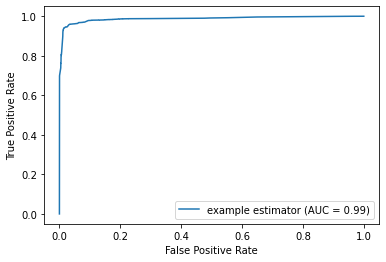

In [118]:
fpr,tpr,thresholds=metrics.roc_curve(train['attack'], result.predict())
roc_auc =metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='example estimator')
display.plot()


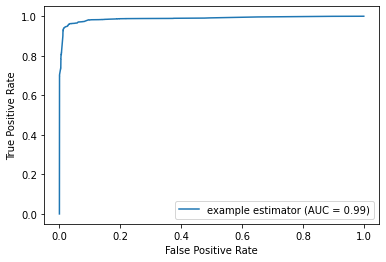

In [119]:
fpr,tpr,thresholds=metrics.roc_curve(test['attack'], result.predict(test))
roc_auc =metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

In [120]:
fpr,tpr,thresholds=metrics.roc_curve(train['attack'], result.predict())

In [121]:
for_roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'fnr': 1-fpr,'thresholds':thresholds})
for_roc

,fpr,tpr,fnr,thresholds
0,0.000000,0.000000,1.000000,2.000000
1,0.000000,0.000024,1.000000,1.000000
2,0.000000,0.001098,1.000000,0.999999
3,0.000000,0.001220,1.000000,0.999999
4,0.000000,0.001366,1.000000,0.999999
...,...,...,...,...
8201,0.999788,1.000000,0.000212,0.000007
8202,0.999830,1.000000,0.000170,0.000007
8203,0.999852,1.000000,0.000148,0.000007
8204,0.999894,1.000000,0.000106,0.000007


## Youden's J statistic for cutt_off

In [122]:

def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

cutoff_youdens_j(for_roc.fpr,for_roc.tpr,for_roc.thresholds)


0.769124721995079

In [123]:
train['pred']=result.predict()

<ipython-input-123-5294259f11c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pred']=result.predict()


In [101]:
tr = pd.DataFrame()

In [102]:
tr['actual']=train.attack
tr['pred']=np.where(train.pred > 0.769124721995079 ,1,0)

In [103]:
metrics.confusion_matrix(tr.actual,tr.pred)

array([[46494,   687],
       [ 2453, 38547]], dtype=int64)

In [104]:
metrics.accuracy_score(tr.actual,tr.pred)

0.9643914221884533

## checking using default 0.5 as cutt-off  value

In [105]:
tr2 =pd.DataFrame()
tr2['actual']= train.attack
tr2['pred']=np.where(train.pred > 0.5 ,1,0)

In [106]:
tr2

,actual,pred
110849,1,1
4591,0,1
96407,1,1
55086,1,1
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,1,1
15725,0,0


In [107]:
metrics.confusion_matrix(tr2.actual,tr2.pred)

array([[45903,  1278],
       [ 2083, 38917]], dtype=int64)

In [108]:
metrics.accuracy_score(tr2.actual,tr2.pred)

0.9618852133679591

### using  Youden's J statistic for cutt_off as it  yields better results

In [109]:
log_test =pd.DataFrame({'actual':test.attack,'pred_proba': result.predict(test)})

In [110]:
log_test

,actual,pred_proba
85247,0,0.019270
121265,1,0.999506
99209,1,0.973201
8177,1,0.999226
90461,0,0.109420
...,...,...
43376,0,0.015986
121620,1,0.999180
125669,1,0.999998
64011,0,0.016364


In [111]:
log_test['predicted'] = np.where(log_test.pred_proba > 0.769124721995079 ,1,0)

In [124]:
log_test

,actual,pred_proba,predicted
85247,0,0.019270,0
121265,1,0.999506,1
99209,1,0.973201,1
8177,1,0.999226,1
90461,0,0.109420,0
...,...,...,...
43376,0,0.015986,0
121620,1,0.999180,1
125669,1,0.999998,1
64011,0,0.016364,0


In [127]:
metrics.confusion_matrix(log_test.actual,log_test.predicted)

array([[19857,   305],
       [ 1031, 16599]], dtype=int64)

In [128]:
metrics.accuracy_score(log_test.actual,log_test.predicted)

0.9646486028789162

In [129]:
merge_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [131]:
var

['diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'flag_RSTR',
 'flag_S0',
 'flag_S1',
 'is_guest_login',
 'logged_in',
 'protocol_type_icmp',
 'same_srv_rate',
 'service_IRC',
 'service_eco_i',
 'service_ecr_i',
 'service_imap4',
 'service_private',
 'service_urp_i',
 'srv_rerror_rate',
 'srv_serror_rate',
 'wrong_fragment']

In [133]:
imp_var =['diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'flag_RSTR',
 'flag_S0',
 'flag_S1',
 'is_guest_login',
 'logged_in',
 'protocol_type_icmp',
 'same_srv_rate',
 
 'service_eco_i',
 'service_ecr_i',
 'service_imap4',
 'service_private',
 'service_urp_i',
 'srv_rerror_rate',
 'srv_serror_rate'
 ]

In [148]:
test_log_pre = pd.DataFrame({'actual': merge_data_test.attack, 'pred':result.predict(merge_data_test[imp_var])})

In [150]:
test_log_pre['predicted'] = np.where(test_log_pre.pred > 0.769124721995079 ,1,0)

In [151]:
test_log_pre

,actual,pred,predicted
0,1,0.999774,1
1,1,0.999806,1
2,0,0.007638,0
3,1,0.910035,1
4,1,0.032365,0
...,...,...,...
22539,0,0.019598,0
22540,0,0.016364,0
22541,1,0.015986,0
22542,0,0.001644,0


In [152]:
metrics.accuracy_score(test_log_pre.actual,test_log_pre.predicted)

0.7386887863733144

In [153]:
metrics.confusion_matrix(test_log_pre.actual,test_log_pre.predicted)

array([[9184,  527],
       [5364, 7469]], dtype=int64)

## Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
 "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
 "num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", 
 "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate",
 "same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
 "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
 "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
train_df=pd.read_csv('D:/Pyton-analytixlabs-cs/3. Network Intrusion Detection System/NSL_Dataset/train.txt',names=names)

In [4]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
train_df.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [7]:
train_df.attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [8]:
DoS=['neptune','smurf','back','teardrop','pod','land','apache2','processtable','worm','udpstorm '] 
Probe=['satan','ipsweep','portsweep','nmap','mscan','saint'] 
R2L=['warezclient','guess_passwd','warezmaster','imap','ftp_write','multihop','phf','spy','snmpguess','mailbomb',
          'snmpgetattack ','httptunnel','named','sendmail','xsnoop','Xlock'] 
U2R=['buffer_overflow','rootkit','loadmodule','perl','ps','xterm','sqlattack'] 

In [9]:
train_df['attack']=np.where(train_df.attack.isin(DoS) ,1,np.where(train_df.attack.isin(Probe),2,np.where(train_df.attack.isin(R2L),3,np.where(train_df.attack.isin(U2R),4,0))))

In [10]:
cat_vars=train_df.loc[:,['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']]

In [11]:
cat_vars.dtypes

protocol_type     object
service           object
flag              object
land               int64
logged_in          int64
root_shell         int64
su_attempted       int64
is_host_login      int64
is_guest_login     int64
dtype: object

In [12]:
cat_vars_d=pd.get_dummies(cat_vars.select_dtypes('object'))

In [13]:
train_df.drop(labels=cat_vars.select_dtypes('object'),axis=1,inplace=True)

In [14]:
merge_data=pd.concat([train_df,cat_vars_d],axis=1)

In [15]:
merge_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


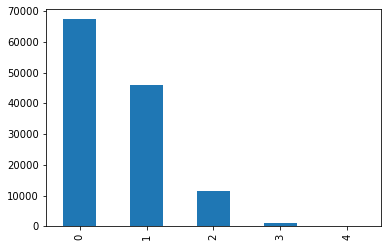

In [16]:
merge_data.attack.value_counts().plot(kind='bar')

In [17]:
test_df=pd.read_csv('D:/Pyton-analytixlabs-cs/3. Network Intrusion Detection System/NSL_Dataset/test.txt',names=names)

In [18]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [19]:
cat_vars=test_df.loc[:,['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']]

In [20]:
cat_vars_d=pd.get_dummies(cat_vars.select_dtypes('object'))

In [21]:
test_df.drop(labels=cat_vars.select_dtypes('object'),axis=1,inplace=True)

In [22]:
merge_data_test=pd.concat([test_df,cat_vars_d],axis=1)

In [23]:
merge_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
merge_data_test.attack

0        neptune
1        neptune
2         normal
3          saint
4          mscan
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: attack, Length: 22544, dtype: object

In [25]:
merge_data_test['attack']=np.where(merge_data_test.attack.isin(DoS) ,1,np.where(merge_data_test.attack.isin(Probe),2,np.where(merge_data_test.attack.isin(R2L),3,np.where(merge_data_test.attack.isin(U2R),4,0))))

In [27]:
merge_data_test.attack[0:10]

0    1
1    1
2    0
3    2
4    2
5    0
6    0
7    3
8    0
9    3
Name: attack, dtype: int32

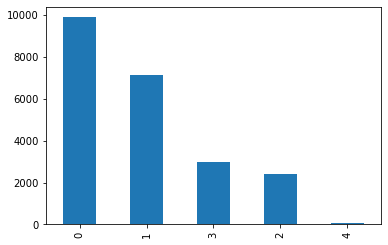

In [28]:
merge_data_test.attack.value_counts().plot(kind='bar')

In [29]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(merge_data[merge_data.columns.difference(['attack'])],merge_data.attack,test_size=0.3,random_state=123)

In [31]:
trainx.shape

(88181, 123)

In [32]:
trainy.shape

(88181,)

In [30]:
merge_data.columns.difference(merge_data_test.columns.to_list())

Index(['service_aol', 'service_harvest', 'service_http_2784',
       'service_http_8001', 'service_red_i', 'service_urh_i'],
      dtype='object')

In [31]:
merge_data_test['service_aol']=0


In [33]:
merge_data_test['service_harvest'] =0

In [34]:
merge_data_test['service_http_2784']=0

In [35]:
merge_data_test['service_http_8001']=0

In [36]:
merge_data_test['service_red_i'] =0

In [37]:
merge_data_test['service_urh_i'] = 0

In [38]:
merge_data_test.shape

(22544, 124)

## Naiye Bayes 

In [68]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GaussianNB()

In [75]:
nb_train=GaussianNB()

In [76]:
nb_train.fit(trainx,trainy)

GaussianNB()

In [80]:
n_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': nb_train.predict( trainx ) } )

In [83]:
import sklearn.metrics as metrics

In [84]:
metrics.accuracy_score(n_train_pred.actual,n_train_pred.predicted)

0.3945861353352763

In [85]:
n_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': nb_train.predict( testx ) } )

In [86]:
n_test_pred

,actual,predicted
85247,0,1
121265,1,1
99209,1,1
8177,1,1
90461,0,1
...,...,...
43376,0,4
121620,1,1
125669,1,1
64011,0,1


In [87]:
metrics.accuracy_score(n_test_pred.actual,n_test_pred.predicted)

0.39770321761219307

In [109]:
n_test = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': nb_train.predict(merge_data_test[merge_data_test.columns.difference(['attack'])]) } )

In [110]:
n_test

,actual,predicted
0,1,1
1,1,1
2,0,1
3,2,1
4,2,1
...,...,...
22539,0,1
22540,0,1
22541,1,0
22542,0,1


In [111]:
metrics.confusion_matrix(n_test.actual,n_test.predicted)

array([[ 551, 8029,   19,   14, 1287],
       [ 836, 5858,  298,  171,    2],
       [   0, 2421,    0,    0,    0],
       [ 231, 2752,    1,    1,    6],
       [  16,   43,    0,    0,    8]], dtype=int64)

In [112]:
metrics.accuracy_score(n_test.actual,n_test.predicted)

0.2846877217885025

## Logistics Regression

In [114]:
import statsmodels.formula.api as smf

In [117]:
from sklearn.linear_model import LogisticRegression

In [115]:
from sklearn.feature_selection import RFE

In [120]:
q=RFE(estimator = LogisticRegression(),n_features_to_select = 20)

In [121]:
q.fit(trainx,trainy)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [130]:
q.ranking_

array([  1,  19,   1,   1,  15,  11,   7,   1,   1,   1,  23,  13,   1,
         1,  91,  14,  27,  81,  24,   1,  69,  80,  89,   1,  73,   4,
        30, 104,  92,   1,   1,  51,   1,  82,  26, 103,   1,  90,  17,
         1,   5,  12,  78,   1,   1,  75,  87,  29,  99,  36,  34,  33,
        43,  44,  47,  49,  55,   6,  59,  18,  20,  50,  54,  28,  31,
        16,  52,  98,  56,   1, 101,  48, 100,  40,  35,  61,  70,  62,
        53,  60,  63,  57,  64,  67,  66,  68,  39,  71,  77,  22,  95,
        83,  76,  84,   3,  94,  86,  85,  88,   9,  74,  72,  65,  45,
        58,  25, 102,  96,  46,  93,  41,  32,  37,  42,  38,   1,   1,
         8,  10,   2,  79,  97,  21])

In [131]:
imp_var_df=pd.DataFrame({'cols':trainx.columns.to_list(),'rank':q.ranking_})

In [141]:
imp_var_df

,cols,rank
0,count,1
1,diff_srv_rate,19
2,dst_bytes,1
3,dst_host_count,1
4,dst_host_diff_srv_rate,15
...,...,...
118,srv_rerror_rate,10
119,srv_serror_rate,2
120,su_attempted,79
121,urgent,97


In [154]:
vars=imp_var_df[imp_var_df['rank'] ==1].loc[:,'cols'].to_list()

In [155]:
vars

['count',
 'dst_bytes',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'duration',
 'flag_S0',
 'flag_SF',
 'last_flag',
 'logged_in',
 'num_compromised',
 'num_root',
 'protocol_type_tcp',
 'same_srv_rate',
 'serror_rate',
 'service_http',
 'src_bytes',
 'srv_count']

In [159]:
train,test = train_test_split(merge_data,test_size=0.3,random_state=123)

In [161]:
lg_reg=LogisticRegression(class_weight ='balanced',n_jobs=-1,solver='newton-cg' )

In [164]:
lg_reg.fit(trainx[vars],trainy)

LogisticRegression(class_weight='balanced', n_jobs=-1, solver='newton-cg')

In [171]:
lg_reg.score(trainx[vars],trainy)

0.7834113924768374

In [176]:
lg_train = pd.DataFrame( { 'actual':  trainy,
                            'predicted': lg_reg.predict(trainx[vars]) } )

In [177]:
lg_train 

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,2,0
52860,1,1
...,...,...
61404,0,3
17730,1,1
28030,2,3
15725,0,0


In [180]:
metrics.accuracy_score(lg_train.actual,lg_train.predicted)

0.7834113924768374

In [181]:
lg_test = pd.DataFrame( { 'actual':  testy,
                            'predicted': lg_reg.predict(test[vars]) } )

In [182]:
lg_test

,actual,predicted
85247,0,0
121265,1,1
99209,1,0
8177,1,1
90461,0,0
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


In [183]:
metrics.accuracy_score(lg_test.actual,lg_test.predicted)

0.7818850550381033

In [188]:
gini_index=2*metrics.roc_auc_score(trainy,lg_reg.predict_proba(train[vars]),multi_class='ovo') -1
gini_index

0.8501797458596076

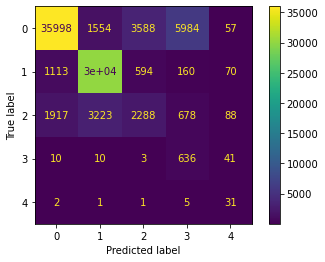

In [201]:
metrics.plot_confusion_matrix(lg_reg,trainx[vars],trainy)

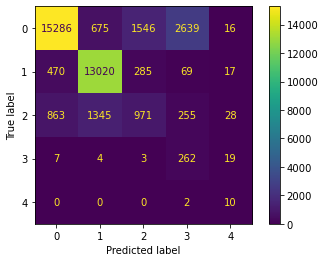

In [202]:
metrics.plot_confusion_matrix(lg_reg,testx[vars],testy)

In [205]:
lg_test_final = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': lg_reg.predict(merge_data_test[vars]) } )

In [209]:
metrics.accuracy_score(lg_test_final.actual,lg_test_final.predicted)

0.650195173882186

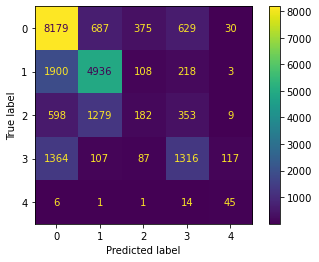

In [210]:
metrics.plot_confusion_matrix(lg_reg,merge_data_test[vars],merge_data_test.attack)

# Decision Tree

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
DecisionTreeClassifier()

In [216]:
param_grid ={'max_depth' :np.arange(4,30),
            'criterion': ['gini','entropy']}

In [217]:
gs_d=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,n_jobs=-1 )

In [218]:
gs_d.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [219]:
gs_d.best_params_

{'criterion': 'entropy', 'max_depth': 16}

In [224]:
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth = 16,random_state=123)

In [225]:
d_tree.fit(trainx,trainy)

DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=123)

In [226]:
lg_train = pd.DataFrame( { 'actual':  trainy,
                            'predicted': d_tree.predict(trainx) } )

In [229]:
lg_train

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,2,2
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,2,2
15725,0,0


In [230]:
metrics.accuracy_score(lg_train.actual,lg_train.predicted)

0.9999773193771901

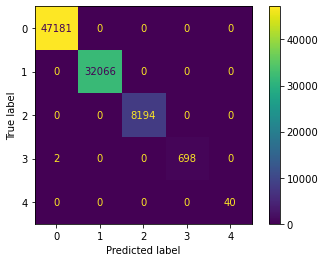

In [231]:
metrics.plot_confusion_matrix(d_tree,trainx,trainy)

In [232]:
lg_test = pd.DataFrame( { 'actual':  testy,
                            'predicted': d_tree.predict(testx) } )

In [233]:
lg_test

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


In [235]:
metrics.accuracy_score(lg_test.actual,lg_test.predicted)

0.9985182049110923

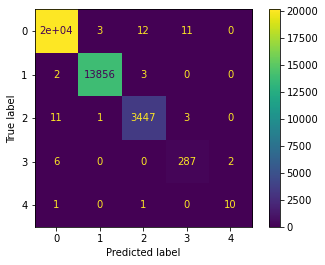

In [236]:
metrics.plot_confusion_matrix(d_tree,testx,testy)

In [242]:
lg_test_final = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': d_tree.predict(merge_data_test[merge_data_test.columns.difference(['attack'])])})

In [243]:
metrics.accuracy_score(lg_test_final.actual,lg_test_final.predicted)

0.806556068133428

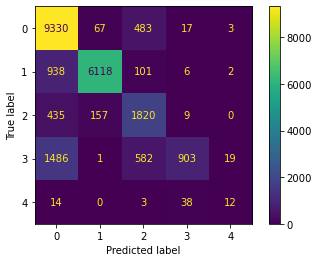

In [245]:
metrics.plot_confusion_matrix(d_tree,merge_data_test[merge_data_test.columns.difference(['attack'])],merge_data_test.attack)

# RandomForest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [ ]:
RandomForestClassifier()

In [81]:
param_grid={'n_estimators':[100,200,300,400,500],
           }

In [82]:
g_s = GridSearchCV(estimator =  RandomForestClassifier(),param_grid =param_grid,cv=5,n_jobs=-1)

In [83]:
g_s.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [84]:
g_s.best_params_

{'n_estimators': 200}

In [59]:
g_s.best_score_

0.9973350203885513

In [61]:
rf_model=RandomForestClassifier(n_estimators = 400,max_depth =9,random_state=123,n_jobs=-1,oob_score=True)

In [62]:
rf_model.fit(trainx,trainy)

RandomForestClassifier(max_depth=9, n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123)

In [64]:
rf_model.score(trainx,trainy)

0.9977319377190098

In [85]:
ra_train = pd.DataFrame( { 'actual':  trainy,
                            'predicted': rf_model.predict(trainx) } )

In [86]:
ra_train

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,2,2
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,2,2
15725,0,0


In [87]:
metrics.accuracy_score(ra_train.actual,ra_train.predicted)

0.9977319377190098

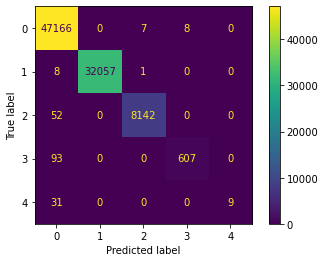

In [88]:
metrics.plot_confusion_matrix(rf_model,trainx,trainy)

In [89]:
ra_test = pd.DataFrame( { 'actual':  testy,
                            'predicted': rf_model.predict(testx) } )

In [90]:
metrics.accuracy_score(ra_test.actual,ra_test.predicted)

0.997221634208298

In [91]:
metrics.accuracy_score(ra_test.actual,ra_test.predicted)

0.997221634208298

In [101]:
ra_test_final = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': rf_model.predict(merge_data_test[merge_data_test.columns.difference(['attack'])]) } )

In [102]:
ra_test_final

,actual,predicted
0,1,1
1,1,1
2,0,0
3,2,2
4,2,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [103]:
metrics.accuracy_score(ra_test_final.actual,ra_test_final.predicted)

0.7535486160397445

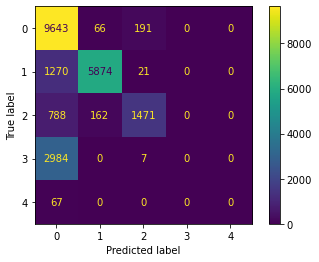

In [104]:
metrics.plot_confusion_matrix(rf_model,merge_data_test[merge_data_test.columns.difference(['attack'])],merge_data_test.attack)

# ADA BOOST

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
param_g= {'n_estimators':[100,200,300,400,500],
          'learning_rate' : [10**x for x in range(-3,1)]}

In [107]:
grid_ada=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_g,cv=5,n_jobs=-1)

In [108]:
grid_ada.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [109]:
grid_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 300}

In [110]:
grid_ada.best_score_

0.847721645996871

In [59]:
ada_tree=AdaBoostClassifier(n_estimators=300,learning_rate=0.01,random_state=123)

In [60]:
ada_tree.fit(trainx,trainy)

AdaBoostClassifier(learning_rate=0.01, n_estimators=300, random_state=123)

In [113]:
ada_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': ada_tree.predict( trainx ) } )

In [114]:
ada_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,2,2
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,2,2
15725,0,0


In [115]:
metrics.accuracy_score(ada_train_pred.actual,ada_train_pred.predicted)

0.9029496149964278

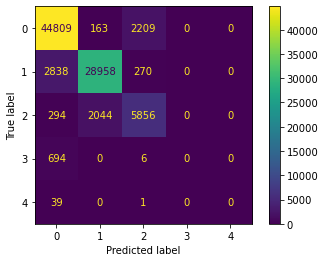

In [117]:
metrics.plot_confusion_matrix(ada_tree,trainx,trainy)

In [118]:
ada_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': ada_tree.predict( testx ) } )

In [119]:
ada_test_pred

,actual,predicted
85247,0,0
121265,1,1
99209,1,0
8177,1,1
90461,0,2
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


In [120]:
metrics.accuracy_score(ada_test_pred.actual,ada_test_pred.predicted)

0.9076524132091448

In [122]:
ada_test_final = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': ada_tree.predict( merge_data_test[merge_data_test.columns.difference(['attack'])]) })

In [123]:
ada_test_final

,actual,predicted
0,1,1
1,1,1
2,0,0
3,2,2
4,2,0
...,...,...
22539,0,0
22540,0,0
22541,1,0
22542,0,0


In [124]:
metrics.accuracy_score(ada_test_final.actual,ada_test_final.predicted)

0.7129613200851668

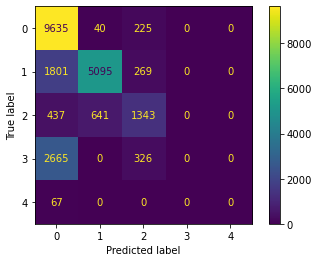

In [125]:
metrics.plot_confusion_matrix(ada_tree,merge_data_test[merge_data_test.columns.difference(['attack'])],merge_data_test.attack)

# Gradient Boost

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [40]:
param_grid={'n_estimators':[100,200,300,400,500],
            'learning_rate':[10**x for x in range(-3,0)]}

In [43]:
grid_b=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [ ]:
grid_b.fit(trainx,trainy)

In [45]:
gb_model=GradientBoostingClassifier()
gb_model.fit(trainx,trainy)

GradientBoostingClassifier()

In [67]:
gb_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': gb_model.predict( trainx ) } )

In [68]:
gb_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,2,2
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,2,2
15725,0,0


In [71]:
metrics.accuracy_score(gb_train_pred.actual,gb_train_pred.predicted)

0.9991494766446286

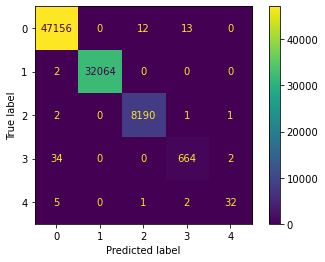

In [53]:
metrics.plot_confusion_matrix(gb_model,trainx,trainy)

In [74]:
gb_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': gb_model.predict( testx ) } )

In [75]:
metrics.accuracy_score(gb_test_pred.actual,gb_test_pred.predicted)

0.9984388230313294

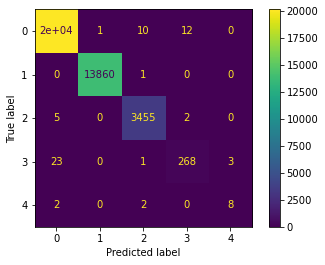

In [55]:
metrics.plot_confusion_matrix(gb_model,testx,testy)

In [49]:
gb_test_final = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': gb_model.predict( merge_data_test[merge_data_test.columns.difference(['attack'])] ) } )

In [50]:
gb_test_final

,actual,predicted
0,1,1
1,1,1
2,0,0
3,2,2
4,2,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [51]:
metrics.accuracy_score(gb_test_final.actual,gb_test_final.predicted)

0.7863733144073811

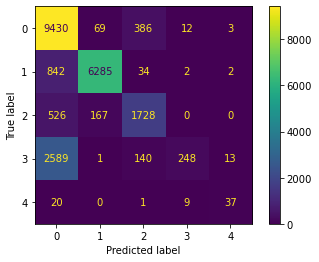

In [52]:
metrics.plot_confusion_matrix(gb_model,merge_data_test[merge_data_test.columns.difference(['attack'])],merge_data_test.attack)

## XG-Boost

In [57]:
from xgboost import XGBClassifier

In [ ]:
XGBClassifier()

In [62]:
xg_model=XGBClassifier(objective='multi:softmax',random_state=123)

In [63]:
xg_model.fit(trainx,trainy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
xg_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': xg_model.predict( trainx ) } )

In [65]:
xg_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,2,2
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,2,2
15725,0,0


In [66]:
metrics.accuracy_score(xg_train_pred.actual,xg_train_pred.predicted)

1.0

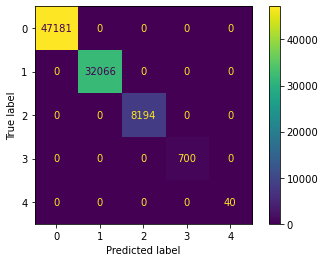

In [70]:
metrics.plot_confusion_matrix(xg_model,trainx,trainy)

In [67]:
xg_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': xg_model.predict(testx) } )

In [68]:
xg_test_pred 

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


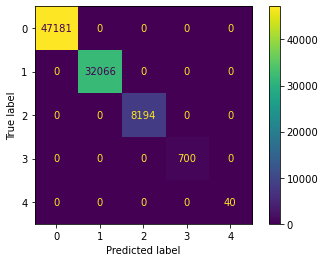

In [72]:
metrics.plot_confusion_matrix(xg_model,trainx,trainy)

In [73]:
xg_test_final = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': xg_model.predict( merge_data_test[merge_data_test.columns.difference(['attack'])]) })

In [74]:
xg_test_final

,actual,predicted
0,1,1
1,1,1
2,0,0
3,2,2
4,2,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [75]:
metrics.accuracy_score(xg_test_final.actual,xg_test_final.predicted)

0.7991039744499645

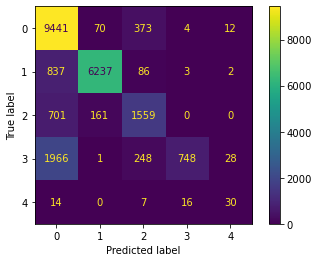

In [76]:
metrics.plot_confusion_matrix(xg_model,merge_data_test[merge_data_test.columns.difference(['attack'])],merge_data_test.attack)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

In [40]:
from sklearn.preprocessing import StandardScaler

In [39]:
KNeighborsClassifier()

KNeighborsClassifier()

In [41]:
sc = StandardScaler()

In [86]:
trainx_scaled = sc.fit_transform(trainx)

In [43]:
testx_scaled = sc.fit_transform(testx)

In [44]:
knn = KNeighborsClassifier(n_jobs=-1)

In [45]:
kn_model=knn.fit(trainx_scaled,trainy)

In [46]:
kn_train_pred = pd.DataFrame( { 'actual':  trainy,
                            'predicted': kn_model.predict(trainx_scaled  ) } )

In [47]:
kn_train_pred

,actual,predicted
110849,1,1
4591,0,0
96407,1,1
55086,2,2
52860,1,1
...,...,...
61404,0,0
17730,1,1
28030,2,2
15725,0,0


In [48]:
metrics.accuracy_score(kn_train_pred.actual,kn_train_pred.predicted)

0.9974824508681008

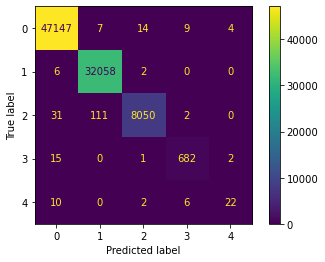

In [49]:
metrics.plot_confusion_matrix(kn_model,trainx_scaled,trainy)

In [52]:
kn_test_pred = pd.DataFrame( { 'actual':  testy,
                            'predicted': kn_model.predict(testx_scaled) } )

In [53]:
kn_test_pred 

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
43376,0,0
121620,1,1
125669,1,1
64011,0,0


In [54]:
metrics.accuracy_score(kn_test_pred.actual,kn_test_pred.predicted)

0.9962955122777307

In [55]:
metrics.confusion_matrix(kn_test_pred.actual,kn_test_pred.predicted)

array([[20149,     5,     6,     2,     0],
       [   10, 13850,     1,     0,     0],
       [   19,    76,  3367,     0,     0],
       [   16,     0,     0,   279,     0],
       [    3,     0,     1,     1,     7]], dtype=int64)

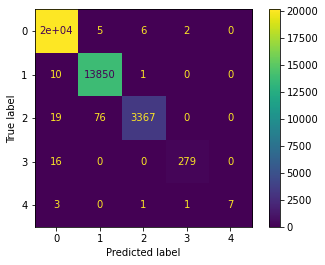

In [60]:
metrics.plot_confusion_matrix(kn_model,testx_scaled,testy)

In [64]:
test_final_scaled = sc.fit_transform(merge_data_test[merge_data_test.columns.difference(['attack'])])

In [66]:
kn_test_final_pred = pd.DataFrame( { 'actual':  merge_data_test.attack,
                            'predicted': kn_model.predict(test_final_scaled) } )

In [67]:
kn_test_final_pred

,actual,predicted
0,1,1
1,1,1
2,0,0
3,2,2
4,2,0
...,...,...
22539,0,0
22540,0,0
22541,1,0
22542,0,0


In [69]:
metrics.accuracy_score(kn_test_final_pred.actual,kn_test_final_pred.predicted)

0.7548349893541518

In [73]:
trainx[train_df.columns.difference(['attack'])]

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
110849,276,0.05,0,234,0.06,0.00,0.00,0.06,0.99,15,...,0.05,1.0,0,15,0.0,0.0,1.0,0,0,0
4591,5,0.40,146,134,0.02,0.00,0.01,0.94,0.00,126,...,0.20,0.0,105,1,0.0,0.0,0.0,0,0,0
96407,220,0.07,0,255,0.09,0.00,0.00,0.01,1.00,3,...,0.01,1.0,0,3,0.0,0.0,1.0,0,0,0
55086,1,0.00,0,4,0.00,0.00,1.00,1.00,0.00,255,...,1.00,0.0,8,3,1.0,0.0,0.0,0,0,0
52860,277,0.06,0,255,0.07,0.00,0.00,0.02,1.00,6,...,0.02,1.0,0,6,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61404,1,0.00,328,84,0.05,0.00,0.01,0.54,0.00,45,...,1.00,0.0,733,2,1.0,0.0,0.0,0,0,0
17730,199,0.06,0,255,0.06,0.00,0.00,0.02,1.00,4,...,0.02,1.0,0,4,0.0,0.0,1.0,0,0,0
28030,1,0.00,0,141,0.10,0.15,0.15,0.01,0.00,1,...,1.00,0.0,0,1,0.0,1.0,0.0,0,0,0
15725,11,0.00,267,27,0.00,0.00,0.04,1.00,0.00,255,...,1.00,0.0,222,11,0.0,0.0,0.0,0,0,0


In [80]:
trainx[cat_vars_d.columns]

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
110849,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4591,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96407,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
55086,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
52860,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61404,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17730,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28030,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15725,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
